## Predicting creditcard default using decision tree algorithm 

This notebook was created in one week time. The main goal for this project was to improve my Python data science skills using a decision tree algorithm for classification. This notebook aims to predict creditcard defaults of clients in the next month. In the first part I explore and clean the dataframe. In the second part I create additional features that may help in predicting creditcard defaults. In the third part I run my decision tree algorithm and check the results. 

In [117]:
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix # importing al necessary libraries 

In [118]:
credit = pd.read_csv("UCI_Credit_Card (3).csv") # Importing dataframe 

### Exploring and cleaning of dataframe

In this part, I try to get a better understanding of my dataframe. In order to understand better what each feature represents I added an addtional file into my repository with a detailed explanation per feature.  

In [119]:
credit.head() # I got 23 features, 1 dependent variable(default.payment.next.month) and 1 index (ID)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [120]:
credit = credit.set_index("ID") 
credit["y"]=credit["default.payment.next.month"]
del credit["default.payment.next.month"] # indexing dataframe by client ID and changing name of dependent variable into y.

In [121]:
credit.shape # The dataset contains data on 30.000 clients

(30000, 24)

In [122]:
credit.isnull().sum() #There is no missing data 

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
y            0
dtype: int64

In [123]:
credit.dtypes #dtypes of all columns are correct

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
y              int64
dtype: object

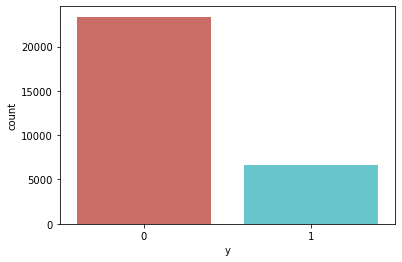

In [124]:
sns.countplot(x="y",data=credit, palette='hls')
plt.show() # the majority of clients does not default. 

In [125]:
credit["SEX"].value_counts() # tha majority of clients are female.

2    18112
1    11888
Name: SEX, dtype: int64

In [126]:
credit["SEX"].replace([2], 0, inplace=True) # I changed values for females from 2 to 0 

In [127]:
credit["EDUCATION"].value_counts() # checking how often a school type occurs. 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [128]:
credit.drop(credit.index[credit['EDUCATION'] == 0], inplace = True) # dropping the 0's these are missing values 
credit["EDUCATION"].replace({6:0,4:0,5:0}, inplace=True) #Group all unknown education types in one value
credit = pd.get_dummies(credit, columns = ["EDUCATION"]) #creating dummy variables for all types of education.
credit.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,0,1,24,2,2,-1,-1,-2,-2,...,689.0,0.0,0.0,0.0,0.0,1,0,0,1,0
2,120000.0,0,2,26,-1,2,0,0,0,2,...,1000.0,1000.0,1000.0,0.0,2000.0,1,0,0,1,0
3,90000.0,0,2,34,0,0,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,1,0
4,50000.0,0,1,37,0,0,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,1,0
5,50000.0,1,1,57,-1,0,-1,0,0,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,0,0,1,0


In [129]:
credit["MARRIAGE"].value_counts() #1=married, 2=single 3=others 0=missing value

2    15954
1    13655
3      323
0       54
Name: MARRIAGE, dtype: int64

In [130]:
credit.drop(credit.index[credit['MARRIAGE'] == 0], inplace = True) # removing the missing values
credit["MARRIAGE"].replace({3:0, 1:0, 2:1}, inplace=True) # For simplicity I made this a binary variable indicating whether someone is married (1) or not (0)

In [131]:
credit[['LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()
# all numerical features seem to have valid descriptive values 

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29932.000000,29932.000000,29932.000000,2.993200e+04,29932.000000,29932.00000,29932.000000,29932.000000,2.993200e+04,29932.000000,29932.000000,29932.000000,29932.000000
mean,167523.375651,51297.386109,49242.862589,4.707703e+04,43320.699452,40367.54861,38927.267072,5659.603034,5.923502e+03,5226.158760,4830.180075,4805.269310,5221.906421
std,129821.209970,73694.489286,71230.373793,6.940473e+04,64385.857098,60845.48775,59601.231051,16555.874642,2.306020e+04,17620.773728,15680.849676,15294.066811,17795.285035
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.00000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,3577.000000,2989.750000,2.685500e+03,2339.750000,1772.75000,1261.000000,1000.000000,8.360000e+02,390.000000,298.000000,255.000000,122.000000
50%,140000.000000,22420.500000,21234.500000,2.011150e+04,19068.500000,18125.50000,17111.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,67283.500000,64136.000000,6.025250e+04,54613.250000,50253.50000,49260.250000,5006.000000,5.000000e+03,4507.250000,4015.000000,4040.250000,4000.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.00000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [132]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show() #creating a function to draw histograms for multiple features
    

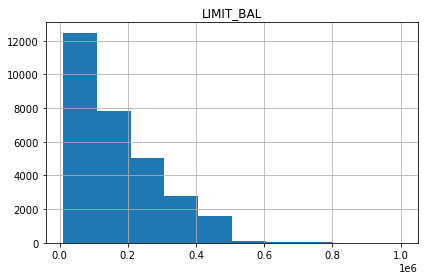

In [133]:
limit = credit[['LIMIT_BAL']]
draw_histograms(limit, limit.columns, 1, 1, 10) # generating a histogram for balance limit 

The distribution of balance limits seems valid, as only small amounts of wealthy people get the highest balance limits.

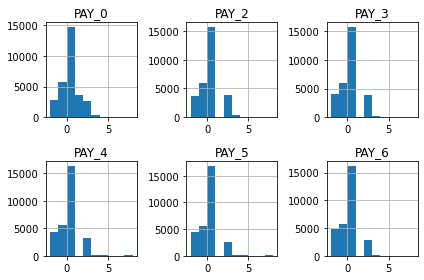

In [134]:
late = credit[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6", ]]
draw_histograms(late, late.columns, 2, 3, 10) #generating histograms for payment delays in any of the previous six months

These histograms show some unexpected results. First of all, -2 and 0 are not indicated as values in the description, therefore it is unknown what these numbers represent. I assume that these two values represent a duly payment, because 1 indicates a one month paymeny delay. Furhter, it is remarkable that, except for payment delays of this month (PAY_0), clients never had a payment delay of just one month. This is impossible because to get to a two month payment delay a month ago (PAY_2), there must have been clients that had a one month payment delay two months ago (PAY_3). For this reason, I decide not to indicate how many months a client had a delay in the past month, but just indicate for each month whether a client had a delay (1) or paid duly (0). 

In [135]:
credit["PAY_0"].replace({-2:0,-1:0,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1}, inplace=True) 
credit["PAY_2"].replace({-2:0,-1:0,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1}, inplace=True)  
credit["PAY_3"].replace({-2:0,-1:0,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1}, inplace=True)  
credit["PAY_4"].replace({-2:0,-1:0,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1}, inplace=True)  
credit["PAY_5"].replace({-2:0,-1:0,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1}, inplace=True) 
credit["PAY_6"].replace({-2:0,-1:0,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1}, inplace=True)  # For each month I set the values to either 1 or 0, indicating a delay or not. 

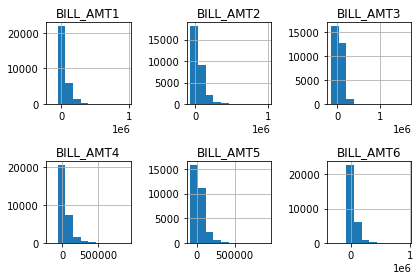

In [136]:
bills = credit[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 10) # generating histograms for bill amount of pervious 6 months 

Distributions of bill amount have a barrier just below 0, which is logical as sometimes people may overpay their debts.

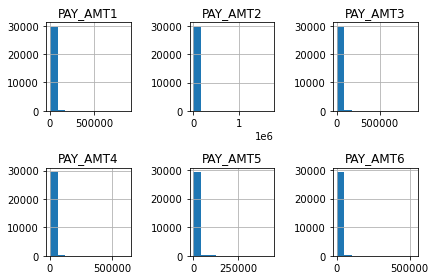

In [137]:
pay = credit[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 10) #generating distributions for payment amount of previous six months. 

Distributions have a barrier at 0 as it is impossible to do a negative payment. Further, the histograms show that cleints have smaller pay amounts than bill amounts indicating that people often pay off debt in smaller portions rather than all at once. 

### Computing new features that could possibly predict creditcard default

In this part, I first look wich features in my current dataframe are correlated to creditcard default. As there were mostly very low correlations, I decided to compute new features for which I could suspect that they would predict creditcard default. I combined the categories of sex and marriage, computed a feature indicating client expense growth and another indicating closeness to balance limit.

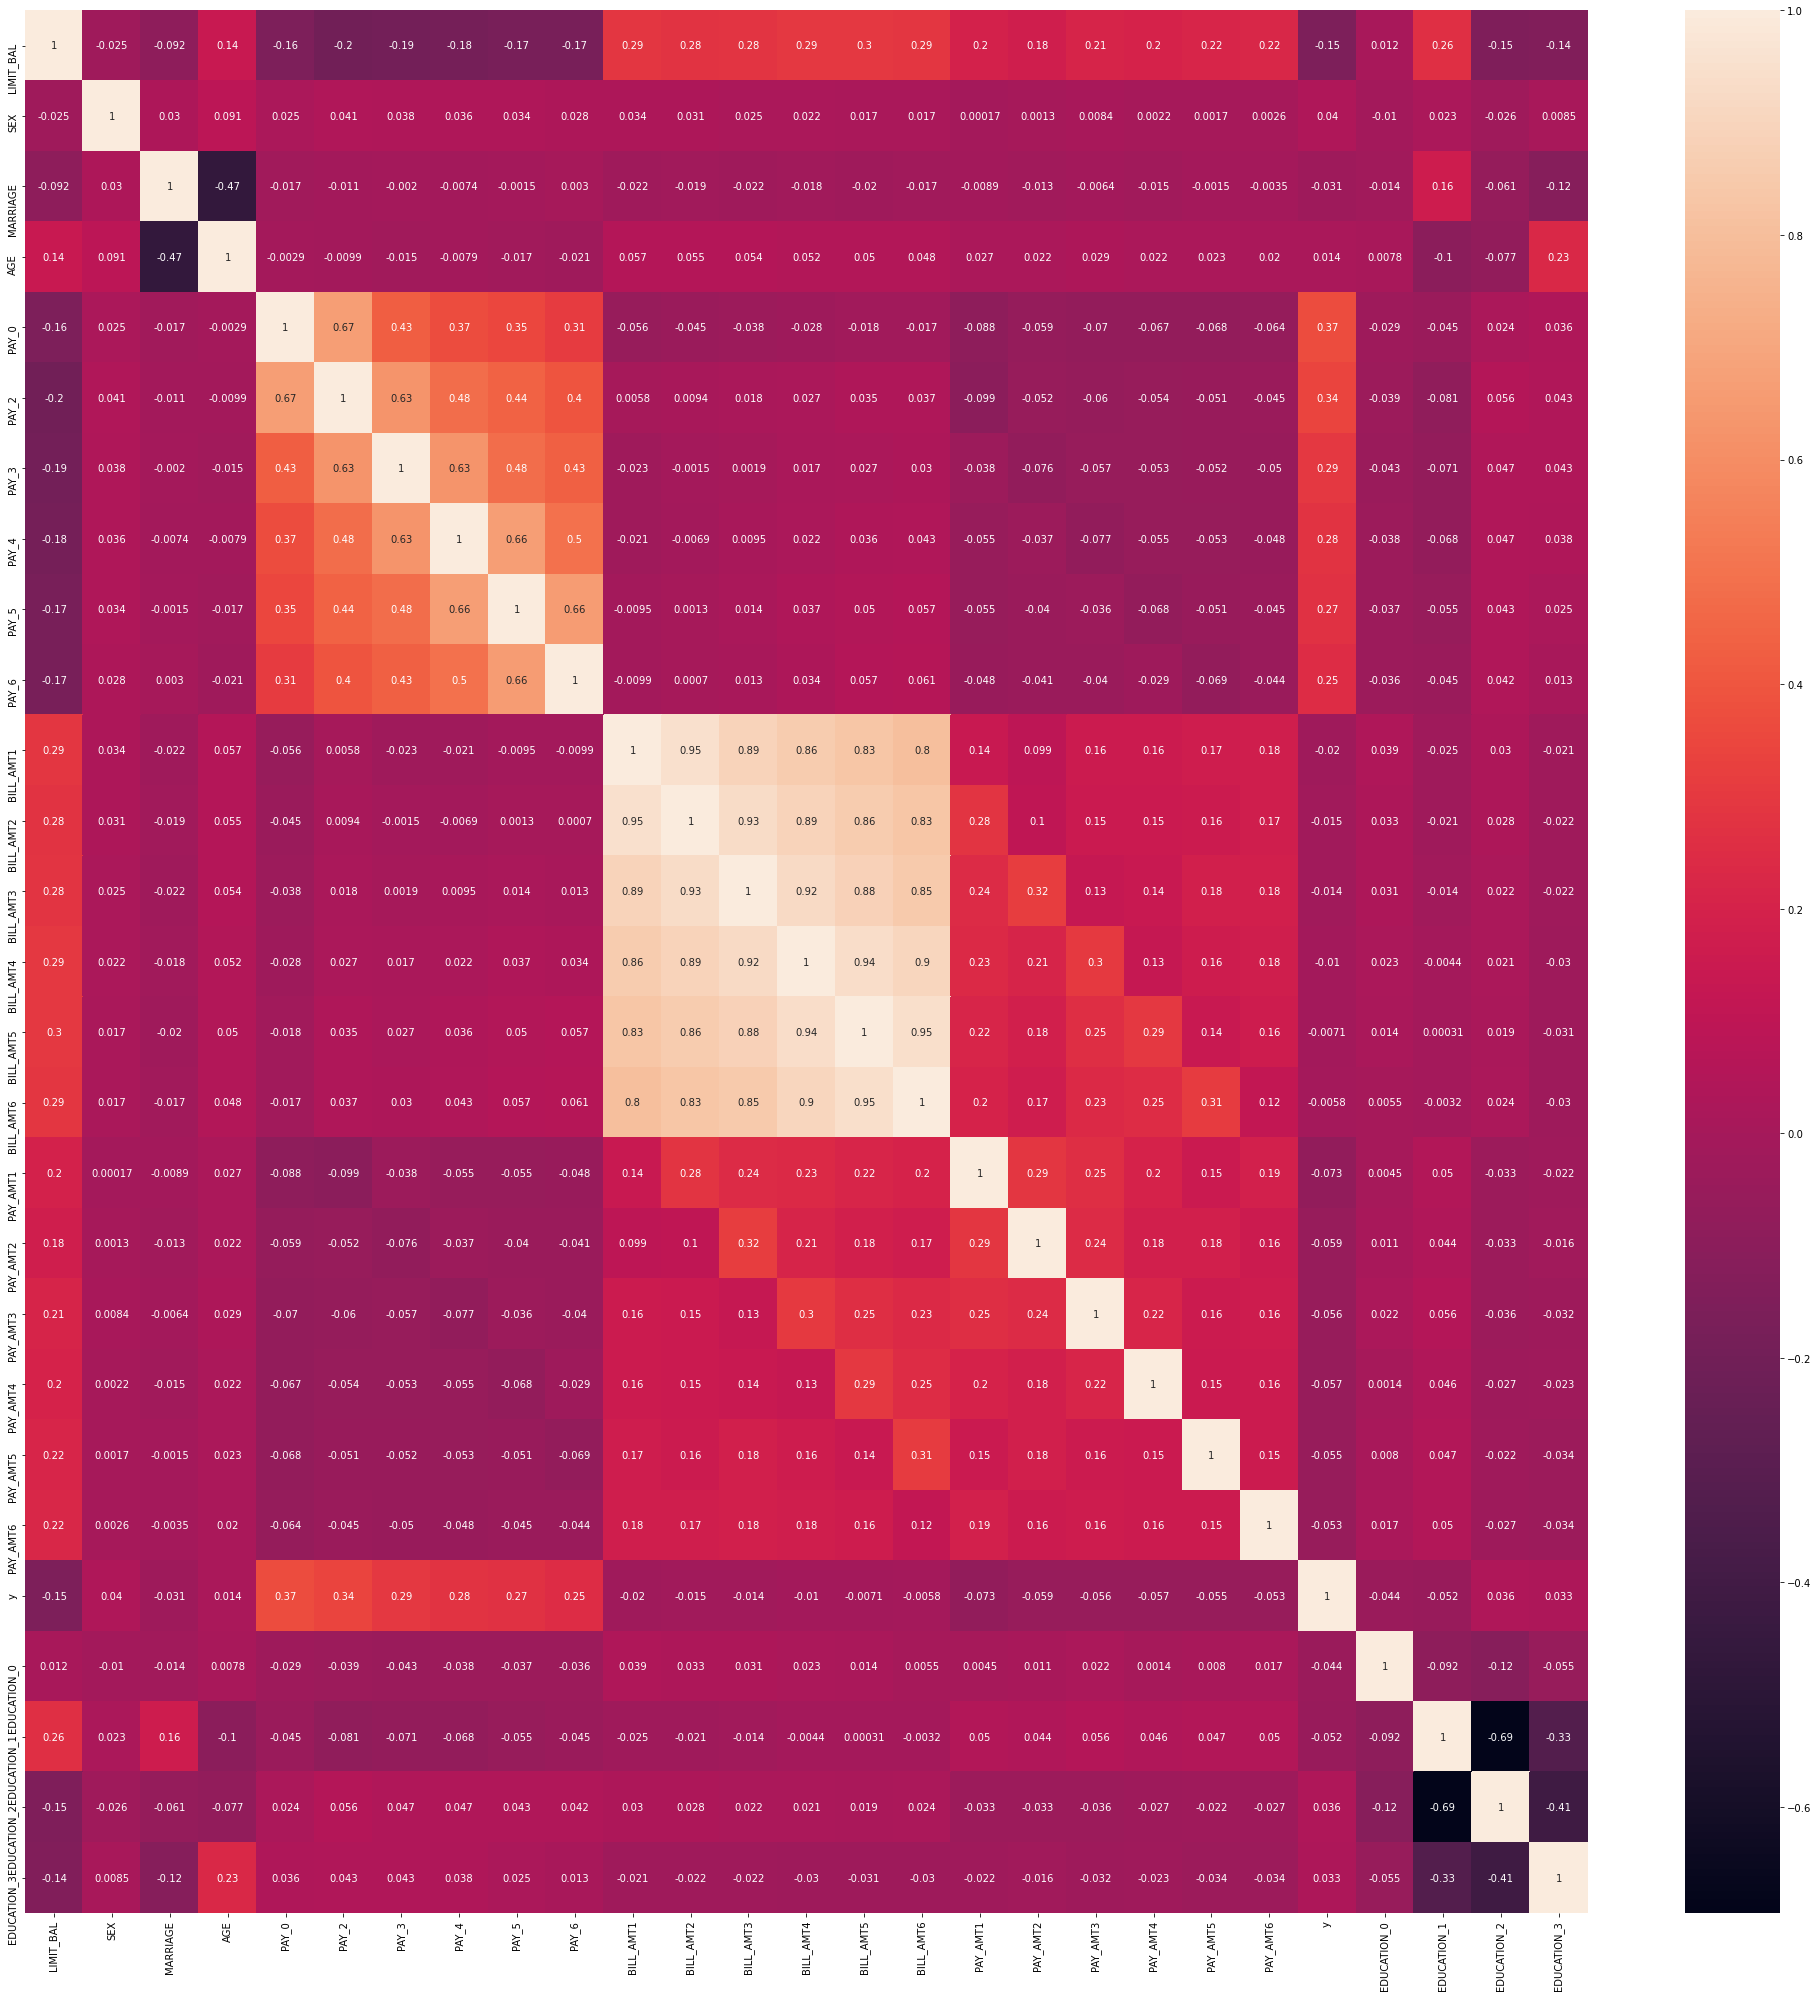

In [138]:
plt.figure(figsize= (35,35))
sns.heatmap(credit.corr(), annot = True) #generating correlation table

There is not one feature with a strong correlation with Y (pay_0 is the strongest with 0.37), this suggest that not one feature on itself is likely to predict creditcard default.  

In [139]:
credit['SenM'] = 0
credit.loc[((credit.SEX == 0) & (credit.MARRIAGE == 0)) , 'SenM'] = 1 #single women
credit.loc[((credit.SEX == 0) & (credit.MARRIAGE == 1)) , 'SenM'] = 0 #married women
credit.loc[((credit.SEX == 1) & (credit.MARRIAGE == 0)) , 'SenM'] = 3 #single men 
credit.loc[((credit.SEX == 1) & (credit.MARRIAGE == 1)) , 'SenM'] = 2 #married men 
#creating more categories in order to search for features that will predict default. 

In [141]:
#def corr_2_cols(Col1, Col2):
res = credit.groupby(['SenM', 'y']).size().unstack()
res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
res #generating table default rate of new categories 

y,0,1,perc
SenM,,,
0,7551,1856,0.197300
1,6755,1904,0.219887
2,5062,1485,0.226821
3,3933,1386,0.260575


Apparently men in general default more often than women and especially single men. Perhaps that single men could be a predictor for creditcard default. 

In [142]:
credit = pd.get_dummies(credit, columns = ["SenM"]) 
credit["single_women"] = credit["SenM_0"]
credit["married_women"] = credit["SenM_1"] 
credit["married_men"] = credit["SenM_2"]
credit["single_men"] = credit["SenM_3"]
del credit["SenM_0"]
del credit["SenM_1"]
del credit["SenM_2"]
del credit["SenM_3"] #creating dummy variables for these new categories. 

In [143]:
credit[['PAY_AMT6', 'BILL_AMT6', 'PAY_AMT5', 
     'BILL_AMT5', 'PAY_AMT4', 'BILL_AMT4', 'PAY_AMT3', 'BILL_AMT3', 
     'PAY_AMT2', 'BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1',
     'LIMIT_BAL', 'y']].sample(20) #trying to visualize the flow of payments and bill amount 

,PAY_AMT6,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_AMT4,BILL_AMT4,PAY_AMT3,BILL_AMT3,PAY_AMT2,BILL_AMT2,PAY_AMT1,BILL_AMT1,LIMIT_BAL,y
ID,,,,,,,,,,,,,,
17634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000.0,0
29911,173.0,291.0,291.0,0.0,0.0,0.0,0.0,780.0,1003.0,-223.0,0.0,167.0,310000.0,0
20284,3000.0,24955.0,875.0,26909.0,877.0,29743.0,1344.0,32638.0,1571.0,32867.0,1558.0,33290.0,60000.0,0
8744,10000.0,165582.0,5000.0,166745.0,10000.0,186168.0,10000.0,178840.0,10000.0,172145.0,7000.0,167856.0,240000.0,0
22826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,1
14417,305.0,8221.0,294.0,8061.0,0.0,8339.0,730.0,7739.0,1130.0,6728.0,1119.0,5861.0,20000.0,0
1520,4700.0,129144.0,5000.0,126007.0,5000.0,122851.0,5000.0,119543.0,4600.0,118103.0,5700.0,171141.0,420000.0,0
27118,5506.0,177338.0,6103.0,187693.0,7006.0,197096.0,7006.0,207215.0,7506.0,217735.0,8006.0,226988.0,360000.0,0
468,500.0,19831.0,620.0,19860.0,627.0,22046.0,655.0,25000.0,1224.0,28006.0,1610.0,28114.0,230000.0,0


It seems that it works as follows. The pay amount of the current month is withdrawn from the bill amount of the previous month to get the current bill amount. Therefore, a client's expenses of the current month must be (Bill amount this month)-(bill amount previous month - pay amount this month). I expect that growth in expenses might be a good predictor for creditcard default, as unexpected expenses might bring some people in trouble. 

In [144]:
credit["Expenses_growth4"]= ((credit["BILL_AMT4"]-(credit["BILL_AMT5"]-credit["PAY_AMT4"])) - (credit["BILL_AMT5"]-(credit["BILL_AMT6"]-credit["PAY_AMT5"])))/(credit["BILL_AMT5"]-(credit["BILL_AMT6"]-credit["PAY_AMT5"]))
credit["Expenses_growth4"] = credit["Expenses_growth4"].replace(np.nan, 0) #removing zero division error
credit["Expenses_growth4"].replace([np.inf, -np.inf], np.nan, inplace=True) 
credit["Expenses_growth3"]= ((credit["BILL_AMT3"]-(credit["BILL_AMT4"]-credit["PAY_AMT3"])) - (credit["BILL_AMT4"]-(credit["BILL_AMT5"]-credit["PAY_AMT4"])))/(credit["BILL_AMT4"]-(credit["BILL_AMT5"]-credit["PAY_AMT4"]))
credit["Expenses_growth3"] = credit["Expenses_growth3"].replace(np.nan, 0) #removing zero division error
credit["Expenses_growth3"].replace([np.inf, -np.inf], np.nan, inplace=True)
credit["Expenses_growth2"]= ((credit["BILL_AMT2"]-(credit["BILL_AMT3"]-credit["PAY_AMT2"])) - (credit["BILL_AMT3"]-(credit["BILL_AMT4"]-credit["PAY_AMT3"])))/(credit["BILL_AMT3"]-(credit["BILL_AMT4"]-credit["PAY_AMT3"]))
credit["Expenses_growth2"] = credit["Expenses_growth2"].replace(np.nan, 0) #removing zero division error
credit["Expenses_growth2"].replace([np.inf, -np.inf], np.nan, inplace=True) 
credit["Expenses_growth1"]= ((credit["BILL_AMT1"]-(credit["BILL_AMT2"]-credit["PAY_AMT1"])) - (credit["BILL_AMT2"]-(credit["BILL_AMT3"]-credit["PAY_AMT2"])))/(credit["BILL_AMT2"]-(credit["BILL_AMT3"]-credit["PAY_AMT2"]))
credit["Expenses_growth1"] = credit["Expenses_growth2"].replace(np.nan, 0) #removing zero division error
credit["Expenses_growth1"].replace([np.inf, -np.inf], np.nan, inplace=True)
credit.dropna(inplace=True) #removing all inf or -inf values
credit[['Expenses_growth1','Expenses_growth2','Expenses_growth3','Expenses_growth4']].describe() 
#generating features indicating the growth in expenses per month, and check descriptives for correct computation of features.

,Expenses_growth1,Expenses_growth2,Expenses_growth3,Expenses_growth4
count,25788.000000,25788.000000,25788.000000,25788.000000
mean,2.370027,2.370027,3.843564,3.545579
std,34.985503,34.985503,39.764723,87.875827
min,-63.089109,-63.089109,-855.500000,-10109.200000
25%,-0.461277,-0.461277,-0.373881,-0.324055
50%,-0.013921,-0.013921,0.000000,0.000000
75%,0.427537,0.427537,0.778844,0.806468
max,3292.924051,3292.924051,4519.491525,7412.800000


Seems that there were some inf or -inf values in the expenses growth features, because the total number of clients has decreased. All other descriptives provide no unexpected results.  

In [145]:
credit["Closeness1"] = ((credit["LIMIT_BAL"]-credit["BILL_AMT1"])/credit["LIMIT_BAL"])
credit["Closeness2"] = ((credit["LIMIT_BAL"]-credit["BILL_AMT2"])/credit["LIMIT_BAL"])
credit["Closeness3"] = ((credit["LIMIT_BAL"]-credit["BILL_AMT3"])/credit["LIMIT_BAL"])
credit["Closeness4"] = ((credit["LIMIT_BAL"]-credit["BILL_AMT4"])/credit["LIMIT_BAL"])
credit["Closeness5"] = ((credit["LIMIT_BAL"]-credit["BILL_AMT5"])/credit["LIMIT_BAL"])
credit["Closeness6"] = ((credit["LIMIT_BAL"]-credit["BILL_AMT6"])/credit["LIMIT_BAL"]) 
# generating features that indicate how close a client was to the balance limit in all previous 6 months 

In [146]:
credit[["Closeness1","Closeness2","Closeness3","Closeness4","Closeness5","Closeness6"]].describe() # generating descriptives on closeness features

,Closeness1,Closeness2,Closeness3,Closeness4,Closeness5,Closeness6
count,25788.000000,25788.000000,25788.000000,25788.000000,25788.000000,25788.000000
mean,0.542624,0.554245,0.566738,0.597796,0.623465,0.639407
std,0.409899,0.403215,0.396135,0.367717,0.350263,0.347324
min,-5.455300,-5.380500,-9.688575,-4.146850,-3.935500,-2.885550
25%,0.140210,0.160058,0.196438,0.282134,0.345358,0.370341
50%,0.601013,0.617763,0.633556,0.660683,0.684255,0.712747
75%,0.963134,0.968738,0.963147,0.962492,0.965635,0.975719
max,1.619892,1.964657,2.025100,2.374500,1.876743,2.509530


The descriptives of the closeness features provide no unexpected results. I expect that closeness to balance limit may be a predictor as balance limit is likely to be created based on a client's income. Thus, closeness could indicate how much debt a client had in relation to their income. This may be a better indicator than just checking for bill amount without taking account of a client's wealth. 

## Decision tree 

In [147]:
credit.columns #outputting all feature names

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'y', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'single_women',
       'married_women', 'married_men', 'single_men', 'Expenses_growth4',
       'Expenses_growth3', 'Expenses_growth2', 'Expenses_growth1',
       'Closeness1', 'Closeness2', 'Closeness3', 'Closeness4', 'Closeness5',
       'Closeness6'],
      dtype='object')

In [98]:
features = ['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'single_women',
       'married_women', 'married_men', 'single_men', 'Closeness1', 'Closeness2', 'Closeness3', 'Closeness4', 'Closeness5',
       'Closeness6', 'Expenses_growth4', 'Expenses_growth3',
       'Expenses_growth2', 'Expenses_growth1']  
X=credit[features].copy()
y=credit["y"].copy() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#  I defined my X and y variable. All features are stored in X. Creditcard default or (y) is stored in y. Thereafter, I divided my data into train and test data.  

In [102]:
DT = DecisionTreeClassifier(random_state = 42) 
DT.fit(X_train, y_train) #training my decision tree classifier model

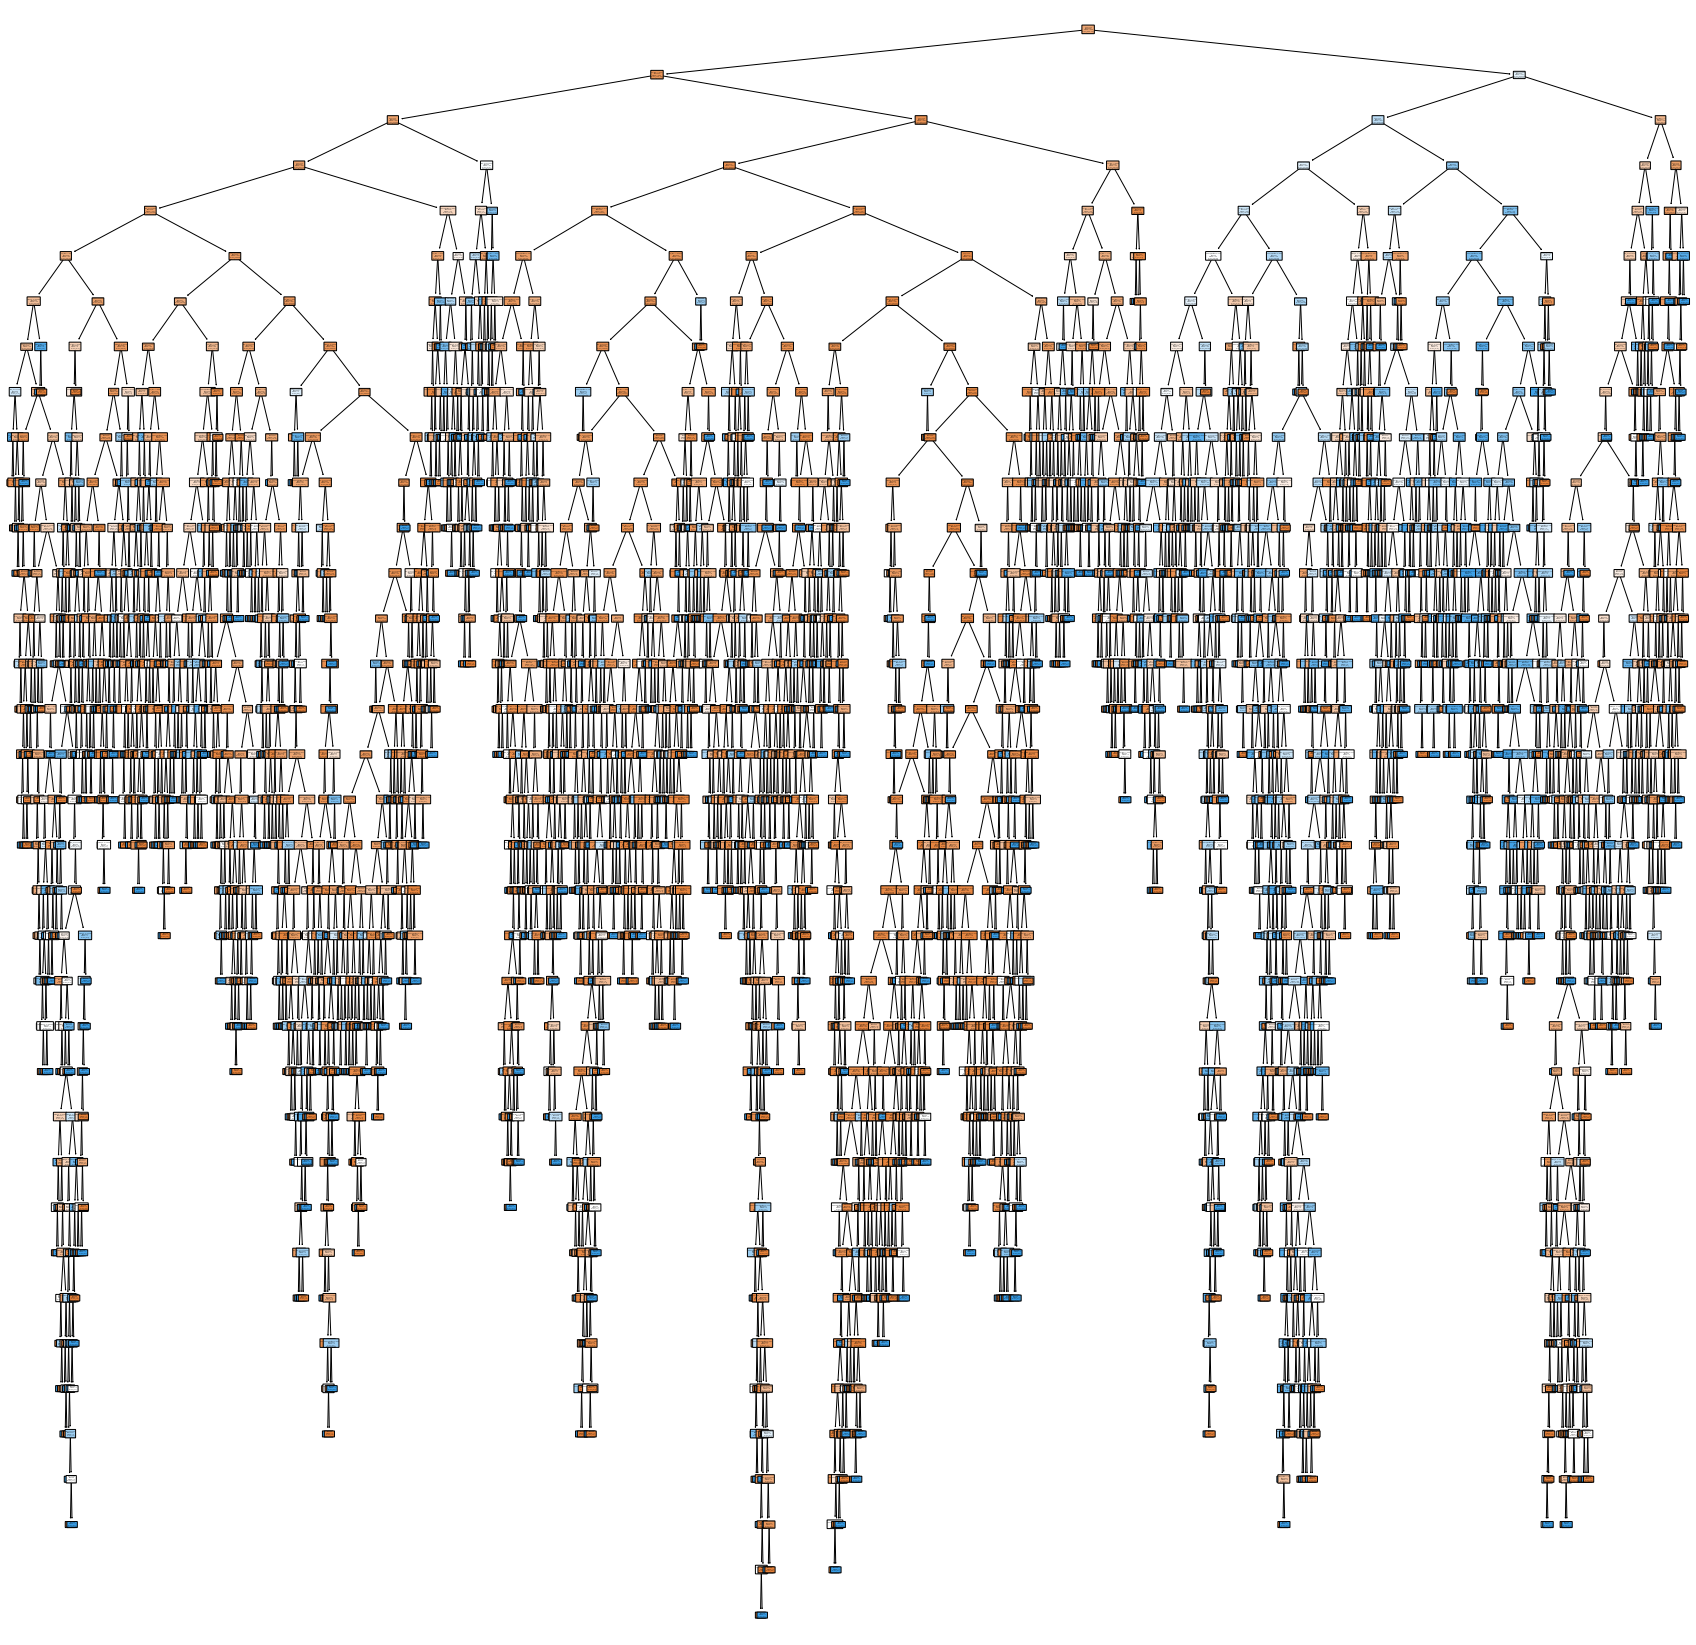

In [104]:
plt.figure(figsize = (30,30))
plot_tree(DT, filled = True, rounded = True, class_names = ["No default", "Yes default"], feature_names = X.columns)
plt.show() # visualizing my decision tree

Due to the high amount of predictor variables, I assume that my model overfitted to the train data as it seems unlikely that all these features have added value in predicting creditcard default. 

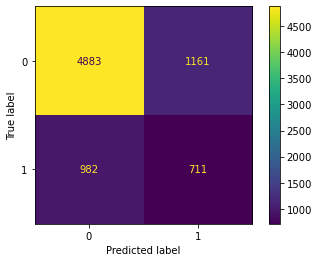

In [105]:
plot_confusion_matrix(DT, X_test, y_test)
plt.show() #Computing confusion matrix.

Model did not perform very well on test data. When it predicts creditcard default it is more often incorrect than correct and it also does not predict more than 50% of all creditcard defaults. 

In [106]:
DT.score(X_train, y_train) #The high score on the train data may again indicate that the model is overfit

0.9992798182926154

In [107]:
DT.score(X_test, y_test) #The score on test data is much lower than the score on the train data, proving that my model is overfit. 

0.7230192581103787

In [108]:
alphas = DT.cost_complexity_pruning_path(X_train, y_train)
trainSetScoreList = []
testSetScoreList = []

for i in alphas.ccp_alphas:
    
    DT = DecisionTreeClassifier(ccp_alpha = i, random_state = 42)
    DT.fit(X_train, y_train)
    
    trainSetScore = DT.score(X_train, y_train)
    trainSetScoreList.append(trainSetScore)
    testSetScore = DT.score(X_test, y_test)
    testSetScoreList.append(testSetScore)
    # creating lists that indicate how well my model predicts the train and test data for each value of alpha. 

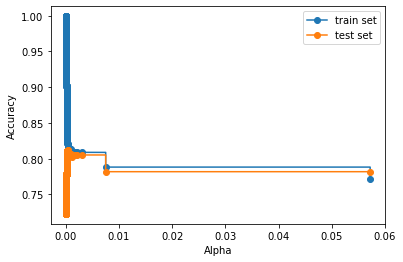

In [110]:
plt.plot(alphas.ccp_alphas, trainSetScoreList, marker = 'o', drawstyle = "steps-post", label = "train set")
plt.plot(alphas.ccp_alphas, testSetScoreList, marker = 'o', drawstyle = "steps-post", label = "test set")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()  #plotting the accuracy for both train and test data for each value of alpha

This graph shows that the accuracy of my model on both my train and test data is almost equal when I use an alpha of 0.0025. For this value of alpha, my model has an accuracy of approx 80% on both my train and test data. This is a higher accuracy on the test data than my overfitted model, that model had 72% accuracy. 

In [111]:
DT = DecisionTreeClassifier(ccp_alpha = 0.0025, random_state = 42)
DT.fit(X_train, y_train) #Again training my decision tree classifier, but this time with a pre-set alpha of 0.0025. 

DecisionTreeClassifier(ccp_alpha=0.0025, random_state=42)

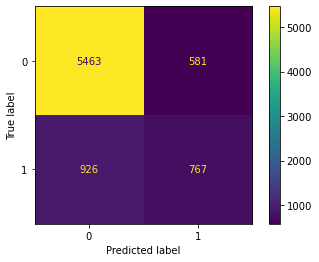

In [ ]:
plot_confusion_matrix(DT, X_test, y_test) #plotting confusion matrix.

The confusion matrix shows that my decision tree model did perform better. When it predicts default is is now more often correct than incorrect. However it still fails to predict more than 50% of all defaults. 

In [ ]:
DT.score(X_train, y_train) # the total prediction score on the train data is 80%

0.808819455985818

In [ ]:
DT.score(X_test, y_test) 
#The total prediction on test data is 80% as well, indicating that my model's performance is more reliable as it has the same predicition score on both dataset and has a higher overall accuracy. 

0.8052216621429494

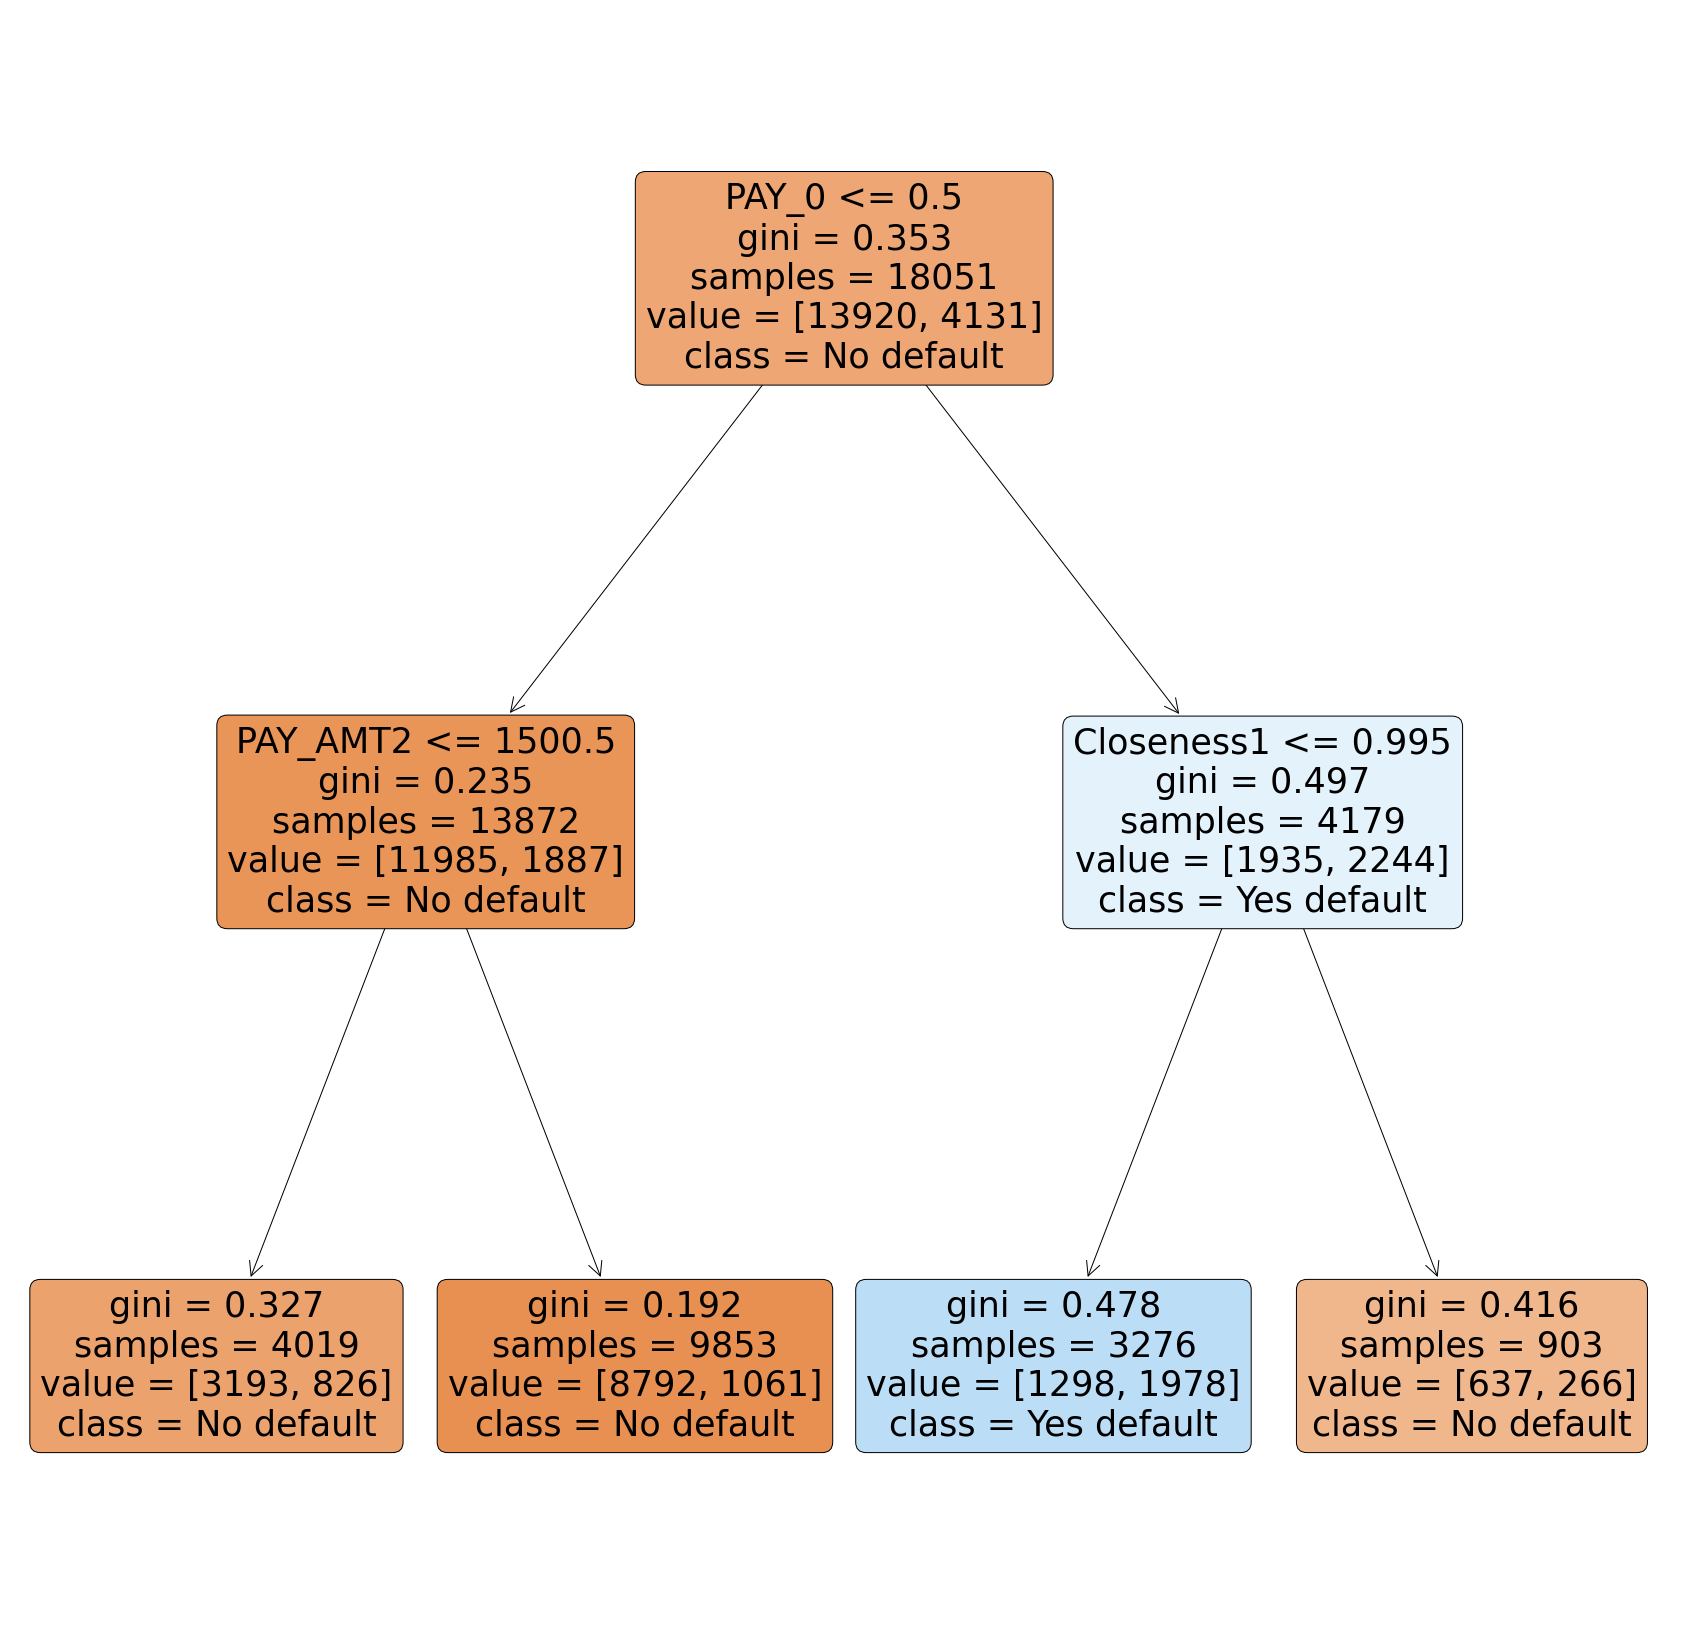

In [ ]:
plt.figure(figsize = (30,30))
plot_tree(DT, filled = True, rounded = True, class_names = ["No default", "Yes default"], feature_names = X.columns)
plt.show() #Visualizing my new decision tree model. 

The decision tree shows, that clients who had a payment delay in the current month and had a bill amount lower than 99,5 procent of the blance limit are most likely to default in the next month. The last part is remarkable, as you might expect that the closer clients are to their balance limit the more difficult they have with paying their bills. Therefore, I suspect that the bank cancels accounts that have exceeded the balance limit for a certain period of time. Furthermore, clients who paid less than 1500,5 a month ago are more likely to default than clients who did not. However, this does nog change the model's perdiction on default as still less than 50% of these clients did not default.  

I am somewhat satisfied with the prediction of my decision tree classifier, 80% is not a bad score. I only hoped that more of the features I created were represented in the model. Now only Pay_0 and closeness 1 are used when predicting creditcard default by a decision tree. 